**Importing** **libraries**

In [8]:
!pip install opendatasets


In [9]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import nltk
import joblib
#downloading wordnet
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Loading Datasets**

In [10]:
#  downloading the datasets using opendatasets
od.download("https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavinkumark7666628@gmail.com
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


100%|██████████| 1.99M/1.99M [00:00<00:00, 86.4MB/s]

In [11]:
df=pd.read_csv('/content/twitter-entity-sentiment-analysis/twitter_training.csv')

In [12]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
df.isnull().sum()

,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


In [14]:
df.isnull().sum()

,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


In [15]:
df.columns=['id','information','type','text']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74681 non-null  int64 
 1   information  74681 non-null  object
 2   type         74681 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [17]:
df.value_counts()

id     information                        type        text                                                                                                                           
5810   HomeDepot                          Positive    Congratulations!!                                                                                                                  5
2895   Dota2                              Positive    Wow                                                                                                                                5
10181  PlayerUnknownsBattlegrounds(PUBG)  Irrelevant  Really                                                                                                                             5
3108   Dota2                              Negative    wtf                                                                                                                                5
1932   CallOfDutyBlackopsColdWar          Positive    Wow                                                                                                                                5
                                                                                                                                                                                        ..
4339   CS-GO                              Negative    @ CSGO your "official servers" are a breeding ground for fraudsters...... @ valvesopls.                                            1
                                                      @CSGO your "official servers" are a breeding zone for hackers.. .. .. @valvesoftware pls fix.                                      1
                                                      @CSGO your "official servers" are a happy zone for spam.... @valvesoftware pls fix.                                                1
                                                      @CSGO your "official servers" for safe breeding location for viruses...... @valvesoftware pls fix.                                 1
13200  Xbox(Xseries)                      Irrelevant  More Amazing deal I found out on ebay looked for quite a RAZER HEADSET.. See rover. net ebay. com / rover / 1 / 08 710 - 53 …..    1
Name: count, Length: 71655, dtype: int64

In [18]:
!pip install scikit-learn

In [19]:
import sklearn

In [20]:
df_train=pd.read_csv("/content/twitter-entity-sentiment-analysis/twitter_training.csv")

In [21]:
df_val=pd.read_csv("/content/twitter-entity-sentiment-analysis/twitter_validation.csv")

In [22]:
data_df=pd.concat([df_train,df_val],ignore_index=False)
data_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                                

In [24]:
columns_to_drop=['2401','3364','Facebook','Irrelevant', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']
data_df= data_df.drop(columns_to_drop,axis=1)

In [25]:
data_df=data_df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 'Positive': 'Sentiment', 'Borderlands':"Branch"})
data_df.head()

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [26]:
data_df.isnull().sum()

,0
Branch,999
Sentiment,999
Tweet,1685


In [27]:
data_df.dropna(inplace=True)
data_df.isnull().sum()

,0
Branch,0
Sentiment,0
Tweet,0


In [28]:
data_df.duplicated().sum()

3038

In [29]:
drop_duplicates=data_df.drop_duplicates()
data_df=drop_duplicates
data_df.duplicated().sum()

0

In [30]:
data_df.columns

Index(['Branch', 'Sentiment', 'Tweet'], dtype='object')

**Making visualisations**

<ipython-input-31-a2adfd4a4376>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_df['Sentiment'].value_counts().index, y=data_df['Sentiment'].value_counts().values, ax=axs[1], palette=colors,edgecolor="black",alpha =0.9)


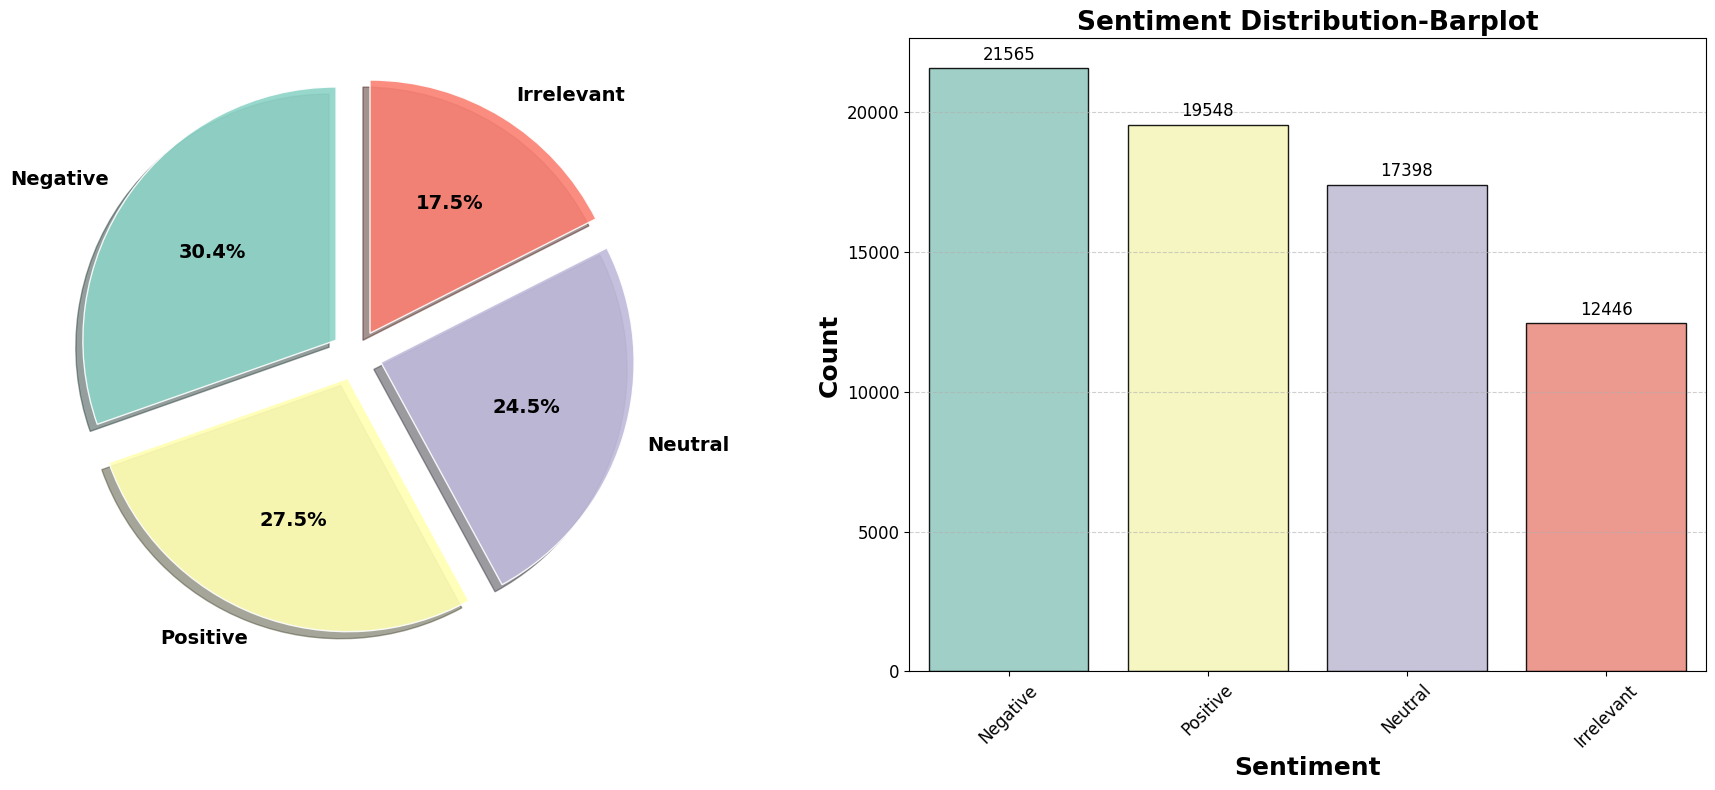

In [31]:
colors=sns.color_palette("Set3",n_colors=4)
fig ,axs = plt.subplots(1,2 ,figsize=(18,8))
sentiment_counts=data_df['Sentiment'].value_counts()
wedges,text ,autotexts= axs[0].pie(data_df['Sentiment'].value_counts(), labels=sentiment_counts.index,
                                      autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1,
                                      'edgecolor': 'white', 'linestyle': 'solid'},
                                      textprops={'fontsize': 14, 'weight': 'bold'}, explode=[0.1, 0.1, 0.1, 0.1],
                                      colors=colors, shadow=True)

for wedge in wedges:
    wedge.set_alpha(0.9)

axs[1].set_title("Sentiment Distribution - Piechart",fontsize=18,weight="bold")
sns.barplot(x=data_df['Sentiment'].value_counts().index, y=data_df['Sentiment'].value_counts().values, ax=axs[1], palette=colors,edgecolor="black",alpha =0.9)
axs[1].set_title("Sentiment Distribution-Barplot",fontsize =19,weight= "bold")
axs[1].set_xlabel("Sentiment",fontsize=18,weight="bold")
axs[1].set_ylabel("Count",fontsize=18,weight="bold")

axs[1].tick_params(axis="x",rotation=45,labelsize=12)
axs[1].tick_params(axis="y",labelsize=12)
axs[1].grid(axis="y",linestyle="--",alpha=0.6)
for p in axs[1].patches:
    axs[1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=12)
plt.tight_layout()
plt.show()

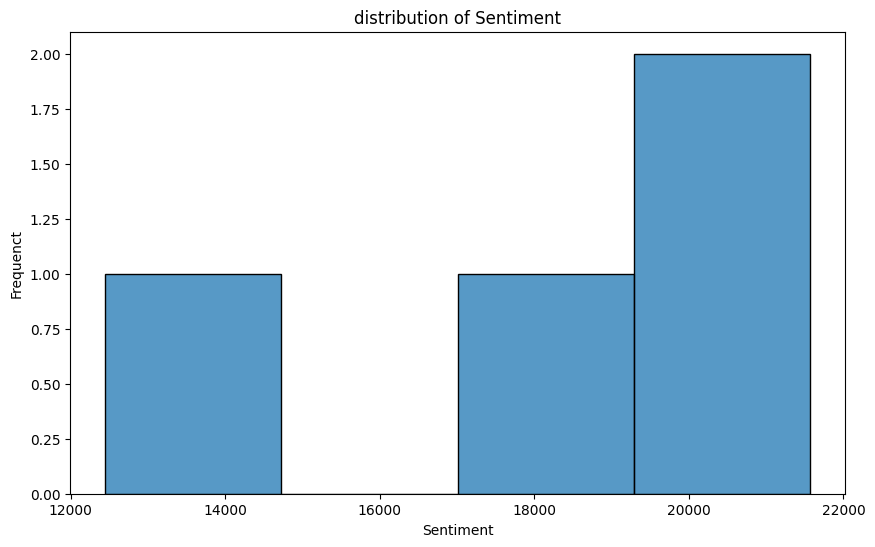

In [36]:
plt.figure(figsize=(10,6))
count_table=pd.crosstab(index=data_df['Branch'],columns=data_df['Sentiment'])
sns.histplot(data_df,x=sentiment_counts,bins=4)
plt.title("distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

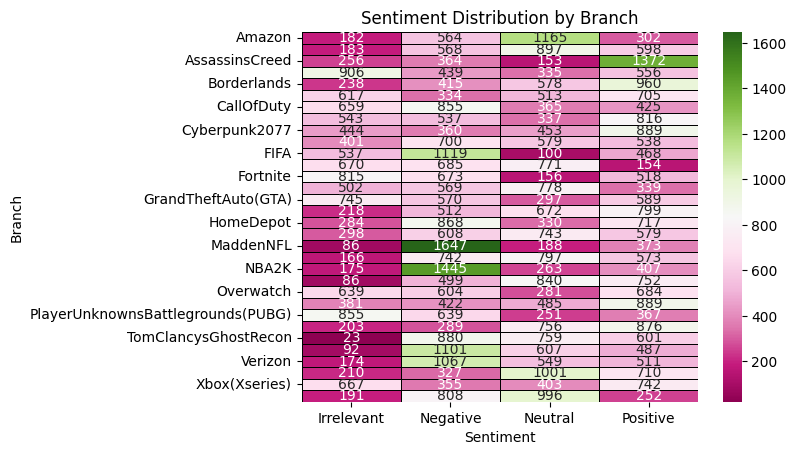

In [37]:
sns.heatmap(count_table,cmap='PiYG', annot=True,fmt='d',linewidths=0.5,linecolor="black")
plt.title('Sentiment Distribution by Branch')
plt.xlabel('Sentiment')
plt.ylabel('Branch')
plt.show()

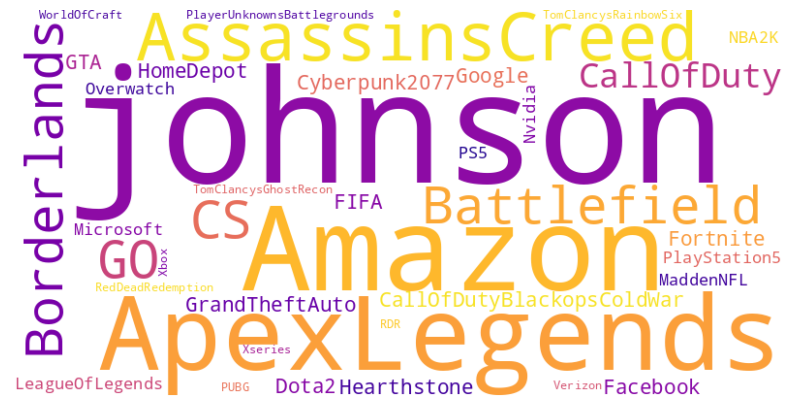

In [38]:
from wordcloud import WordCloud
branches=' '.join(count_table.index)
wordcloud=WordCloud(width=800,height=400,background_color='white',colormap="plasma",contour_color="white",contour_width=2,max_words=200,stopwords=None,font_path=None,prefer_horizontal=0.9).generate(branches)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Preprocessing**

In [39]:
def filter_non_string(data_df,column):
   data_df=data_df.dropna(subset=[column])
   data_df[column]=data_df[column].astype(str)
   return data_df

In [40]:
#To convert lowercase from uppercase apply normalize_text function
def normalize_text(text):
    return text.lower()

In [41]:
#In these text contains html so we have to remove html text in this datasets
def remove_html_tag(text):
   return re.sub(r',.*?>','',text)

In [42]:
#remove url in containing datasets
def remove_url(text):
  return re.sub(r'http\S+','',text)

In [44]:
def remove_numbers(text):
    return re.sub(r'\d+','',text)

In [45]:
def remove_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))

In [46]:
def tokenize_text(text):
    return word_tokenize(text)

In [47]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [48]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [49]:
#remove emojis in text we apply re
import re

def remove_emojis(text):
    """Remove emojis from the text."""
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

In [50]:
from nltk.stem import WordNetLemmatizer

def lemmatize_words(tokens):
    """Lemmatize the tokenized words to their base form."""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

In [51]:
def vectorize_data(text_data):
    # Join the tokenized text into strings
    text_data_strings = [" ".join(tokens) for tokens in text_data]
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    # Fit and transform the text data to generate TF-IDF vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(text_data_strings)
    return tfidf_vectors, tfidf_vectorizer

In [53]:
def preprocess_text(data_df):
    data_df = filter_non_string(data_df, 'Tweet')
    data_df['Tweet'] = data_df['Tweet'].apply(normalize_text)
    data_df['Tweet'] = data_df['Tweet'].apply(remove_html_tag)
    data_df['Tweet'] = data_df['Tweet'].apply(remove_url)
    data_df['Tweet'] = data_df['Tweet'].apply(remove_numbers)
    data_df['Tweet'] = data_df['Tweet'].apply(remove_punctuation)
    data_df['Tweet'] = data_df['Tweet'].apply(tokenize_text)
    data_df['Tweet'] = data_df['Tweet'].apply(remove_stopwords)
    data_df['Tweet'] = data_df['Tweet'].apply(remove_emojis)
    return data_df


In [54]:
data_df_processed = preprocess_text(data_df)

In [55]:
data_df_processed['Tweet'] = data_df_processed['Tweet'].apply(lambda x: ' '.join(x))

# Split data into features (X) and target (y)
X = data_df_processed['Tweet']  # Features
y = data_df_processed['Sentiment']  # Target

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56765,)
Shape of X_test: (14192,)
Shape of y_train: (56765,)
Shape of y_test: (14192,)


**Random Forest Classifier Model**

In [56]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9033962795941376


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mencetak hasil metrik evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9033962795941376
Precision: 0.9065618434047034
Recall: 0.9033962795941376
F1 Score: 0.9034682386833983


In [68]:
from sklearn.metrics import confusion_matrix, classification_report

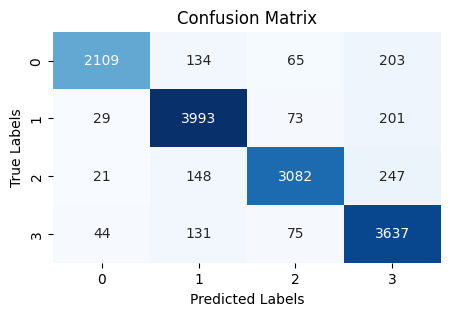

In [69]:
confusion_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [70]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.84      0.89      2511
    Negative       0.91      0.93      0.92      4296
     Neutral       0.94      0.88      0.91      3498
    Positive       0.85      0.94      0.89      3887

    accuracy                           0.90     14192
   macro avg       0.91      0.90      0.90     14192
weighted avg       0.91      0.90      0.90     14192



In [71]:
print("Actual vs Predicted Labels with Tweet Text:")
for tweet , actual , predicted in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual)
    print("Predicted Label:", predicted)

Actual vs Predicted Labels with Tweet Text:
Tweet: women please work stores like circuit home hardware get bored condescending men thinking ’ know another screw
Actual Label: Positive
Predicted Label: Positive
Tweet: zai absolute beast reddit fe
Actual Label: Neutral
Predicted Label: Neutral
Tweet: hard fought indeed …
Actual Label: Neutral
Predicted Label: Neutral
Tweet: rhandlerr ’ superstar solo wins criminal deserved pictwittercomhilloxffi
Actual Label: Irrelevant
Predicted Label: Irrelevant
Tweet: ea eamaddennfl recent announcement ea locked another long term contract nfl remarkably disrespectful fans madden years allow competition madden longer quality
Actual Label: Negative
Predicted Label: Negative
Tweet: first played apex got wave happiness brings back
Actual Label: Positive
Predicted Label: Positive
Tweet: speed better ever however death animation exactly treyarch steer clear ragdoll animation
Actual Label: Neutral
Predicted Label: Neutral
Tweet: apologies becoming hades acco

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [74]:
nb_classfier=MultinomialNB()
nb_classfier.fit(X_train_tfidf,y_train)
y_pred=nb_classfier.predict(X_test_tfidf)
y_pred_nb=nb_classfier.predict(X_test_tfidf)
print("Naive Bayes test Accuracy", accuracy_score(y_test,y_pred_nb))
print("classifiaction report of naive bayes")
print(classification_report(y_test,y_pred_nb))

Naive Bayes test Accuracy 0.711879932356257
classifiaction report of naive bayes
              precision    recall  f1-score   support

  Irrelevant       0.95      0.39      0.55      2511
    Negative       0.64      0.91      0.75      4296
     Neutral       0.85      0.59      0.70      3498
    Positive       0.68      0.81      0.74      3887

    accuracy                           0.71     14192
   macro avg       0.78      0.67      0.68     14192
weighted avg       0.76      0.71      0.70     14192



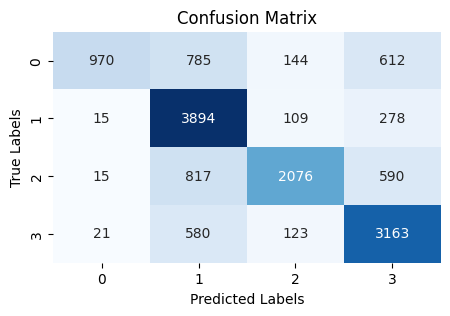

In [80]:
confusion_matrix=confusion_matrix(y_test,y_pred_nb)
class_report=classification_report(y_test,y_pred_nb)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [82]:
print("Classification Report of naive bayes:")
print(class_report)

Classification Report of naive bayes:
              precision    recall  f1-score   support

  Irrelevant       0.95      0.39      0.55      2511
    Negative       0.64      0.91      0.75      4296
     Neutral       0.85      0.59      0.70      3498
    Positive       0.68      0.81      0.74      3887

    accuracy                           0.71     14192
   macro avg       0.78      0.67      0.68     14192
weighted avg       0.76      0.71      0.70     14192



In [83]:
print("Actual vs Predicted Labels with Tweet Text:")
for tweet , actual , predicted in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual)
    print("Predicted Label:", predicted)
    print("-----------------")


Actual vs Predicted Labels with Tweet Text:
Tweet: women please work stores like circuit home hardware get bored condescending men thinking ’ know another screw
Actual Label: Positive
Predicted Label: Negative
-----------------
Tweet: zai absolute beast reddit fe
Actual Label: Neutral
Predicted Label: Positive
-----------------
Tweet: hard fought indeed …
Actual Label: Neutral
Predicted Label: Neutral
-----------------
Tweet: rhandlerr ’ superstar solo wins criminal deserved pictwittercomhilloxffi
Actual Label: Irrelevant
Predicted Label: Negative
-----------------
Tweet: ea eamaddennfl recent announcement ea locked another long term contract nfl remarkably disrespectful fans madden years allow competition madden longer quality
Actual Label: Negative
Predicted Label: Negative
-----------------
Tweet: first played apex got wave happiness brings back
Actual Label: Positive
Predicted Label: Positive
-----------------
Tweet: speed better ever however death animation exactly treyarch steer 

In [84]:
import joblib
joblib.dump(rf_classifier,'random_forest_model.joblib')

['random_forest_model.joblib']

In [92]:
def predict_sentiment(model,vectorizer,data):
    if isinstance(data, str):
        # If it's a single string, transform it and predict
        text_tfidf = vectorizer.transform([data])
    elif isinstance(data, list):
        # If it's a list of strings, transform the entire list
        text_tfidf = vectorizer.transform(data)
    else:
        raise ValueError("Input data must be a string or a list of strings.")

    prediction = model.predict(text_tfidf)
    return prediction

new_text = [
         "This laptop is nice!",
         "I bought this laptop.",
         "Its awesome"
]
predicted_sentiments=predict_sentiment(rf_classifier,vectorizer,new_text)
print(predicted_sentiments)

['Positive' 'Negative' 'Positive']
